In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [2]:
(train_images,train_lables),(test_images,test_labels)=datasets.cifar10.load_data()
train_images,test_images=train_images/255.0,test_images/255.0

170498071/170498071 [==============================] - 2997s 18us/step


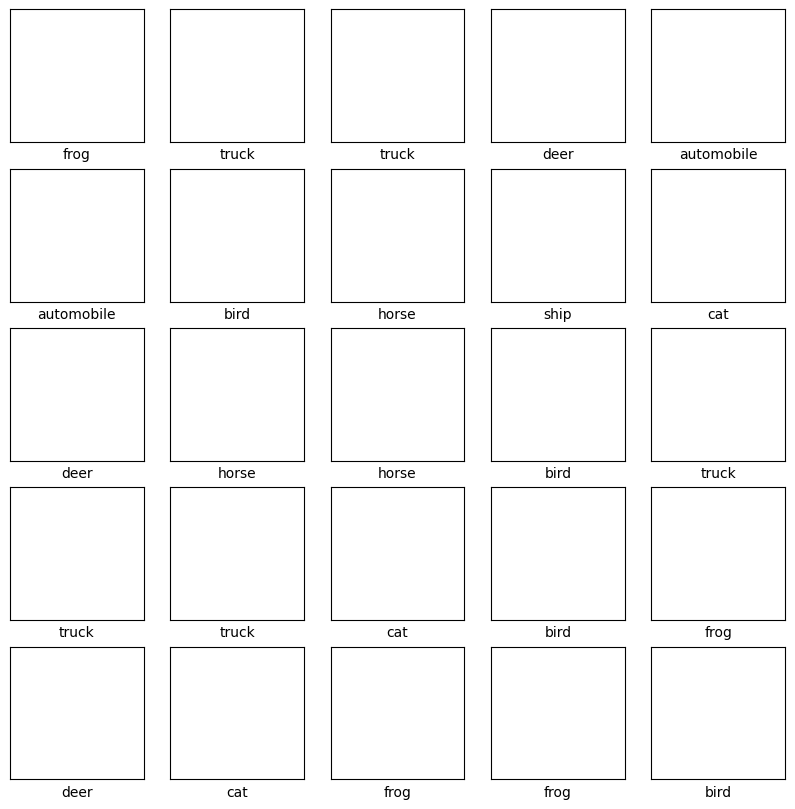

In [20]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship',
            'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[train_lables[i][0]])
plt.show()

In [10]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [11]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
     metrics=['accuracy'])
history=model.fit(train_images,train_lables,epochs=10,
                 validation_data=(test_images,test_labels))

Epoch 1/10


1563/1563 [==============================] - 38s 21ms/step - loss: 1.5153 - accuracy: 0.4500 - val_loss: 1.2419 - val_accuracy: 0.5533
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1709 - accuracy: 0.5831 - val_loss: 1.1028 - val_accuracy: 0.6102
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0371 - accuracy: 0.6317 - val_loss: 0.9853 - val_accuracy: 0.6522
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9468 - accuracy: 0.6641 - val_loss: 0.9913 - val_accuracy: 0.6507
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8766 - accuracy: 0.6911 - val_loss: 0.9155 - val_accuracy: 0.6830
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8217 - accuracy: 0.7101 - val_loss: 0.9248 - val_accuracy: 0.6807
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7685 - accuracy: 0.7294 - val_loss: 0.9364

313/313 - 2s - loss: 0.8678 - accuracy: 0.7055 - 2s/epoch - 8ms/step


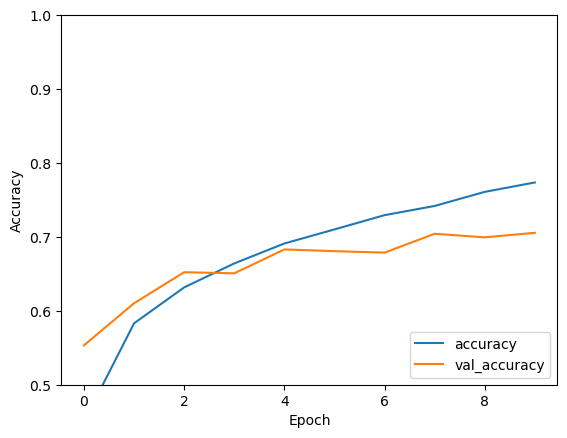

In [18]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

In [19]:
print(test_acc)

0.7055000066757202
